In [79]:
#librairies
import pandas as pd
import numpy as np

In [61]:
def replace_column_names(data_file, headings_file):
    df = pd.read_csv(data_file)
    headings_df = pd.read_csv(headings_file)
    
    # Create a dictionary from the headings DataFrame
    headings_dict = dict(zip(headings_df['Table Heading'], headings_df['Explanatory Name']))
    
    # Replace the column names
    df.rename(columns=headings_dict, inplace=True)
    
    
    return df

df = replace_column_names('HDHI Admission data.csv', 'table_headings.csv')

In [62]:


print(df.columns)
# Print the size of the DataFrame
num_rows = len(df)
print("\nNumber of rows:", num_rows)
    
# Print the first 5 rows of the DataFrame
print("\nHead of the DataFrame:")
print(df.head(2))
    
# Print the shape of the DataFrame
print("\nShape of the DataFrame:", df.shape)
# data types of the columns
print(df.dtypes)


Index(['Serial Number', 'Admission Number', 'Date of Admission',
       'Date of Discharge', 'AGE', 'GENDER', 'RURAL(R) /Urban(U)',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'Diabetes Mellitus', 'Hypertension', 'Coronary Artery Disease',
       'CARDIOMYOPATHY', 'CHRONIC KIDNEY DISEASE', 'Haemoglobin',
       'TOTAL LEUKOCYTES COUNT', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE',
       'B-TYPE NATRIURETIC PEPTIDE', 'RAISED CARDIAC ENZYMES',
       'Ejection Fraction', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA',
       'Acute coronary Syndrome', 'ST ELEVATION MYOCARDIAL INFARCTION',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE',
       'HEART FAILURE WITH REDUCED EJECTION FRACTION',
       'HEART FAILURE WITH NORMAL EJECTION FRACTION', 'Valvular Heart Disease',
       'Complete Heart Block', 'Sick sinus syndrome', 'ACUTE KIDNEY INJURY',
       'Cerebrovascular Accident

In [67]:
print(df.isnull().sum())

Serial Number                                      0
Admission Number                                   0
Date of Admission                                  0
Date of Discharge                                  0
AGE                                                0
GENDER                                             0
RURAL(R) /Urban(U)                                 0
TYPE OF ADMISSION-EMERGENCY/OPD                    0
month year                                         0
DURATION OF STAY                                   0
duration of intensive unit stay                    0
OUTCOME                                            0
SMOKING                                            0
ALCOHOL                                            0
Diabetes Mellitus                                  0
Hypertension                                       0
Coronary Artery Disease                            0
CARDIOMYOPATHY                                     0
CHRONIC KIDNEY DISEASE                        

In [68]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)

Haemoglobin                    252
TOTAL LEUKOCYTES COUNT         286
PLATELETS                      285
GLUCOSE                        863
UREA                           241
CREATININE                     247
B-TYPE NATRIURETIC PEPTIDE    8441
Ejection Fraction             1505
dtype: int64


In [71]:
df = df.dropna(subset=['TOTAL LEUKOCYTES COUNT', 'Haemoglobin', 'PLATELETS', 'UREA', 'CREATININE'])

null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)


GLUCOSE                        692
B-TYPE NATRIURETIC PEPTIDE    8168
Ejection Fraction             1468
dtype: int64


<Axes: >

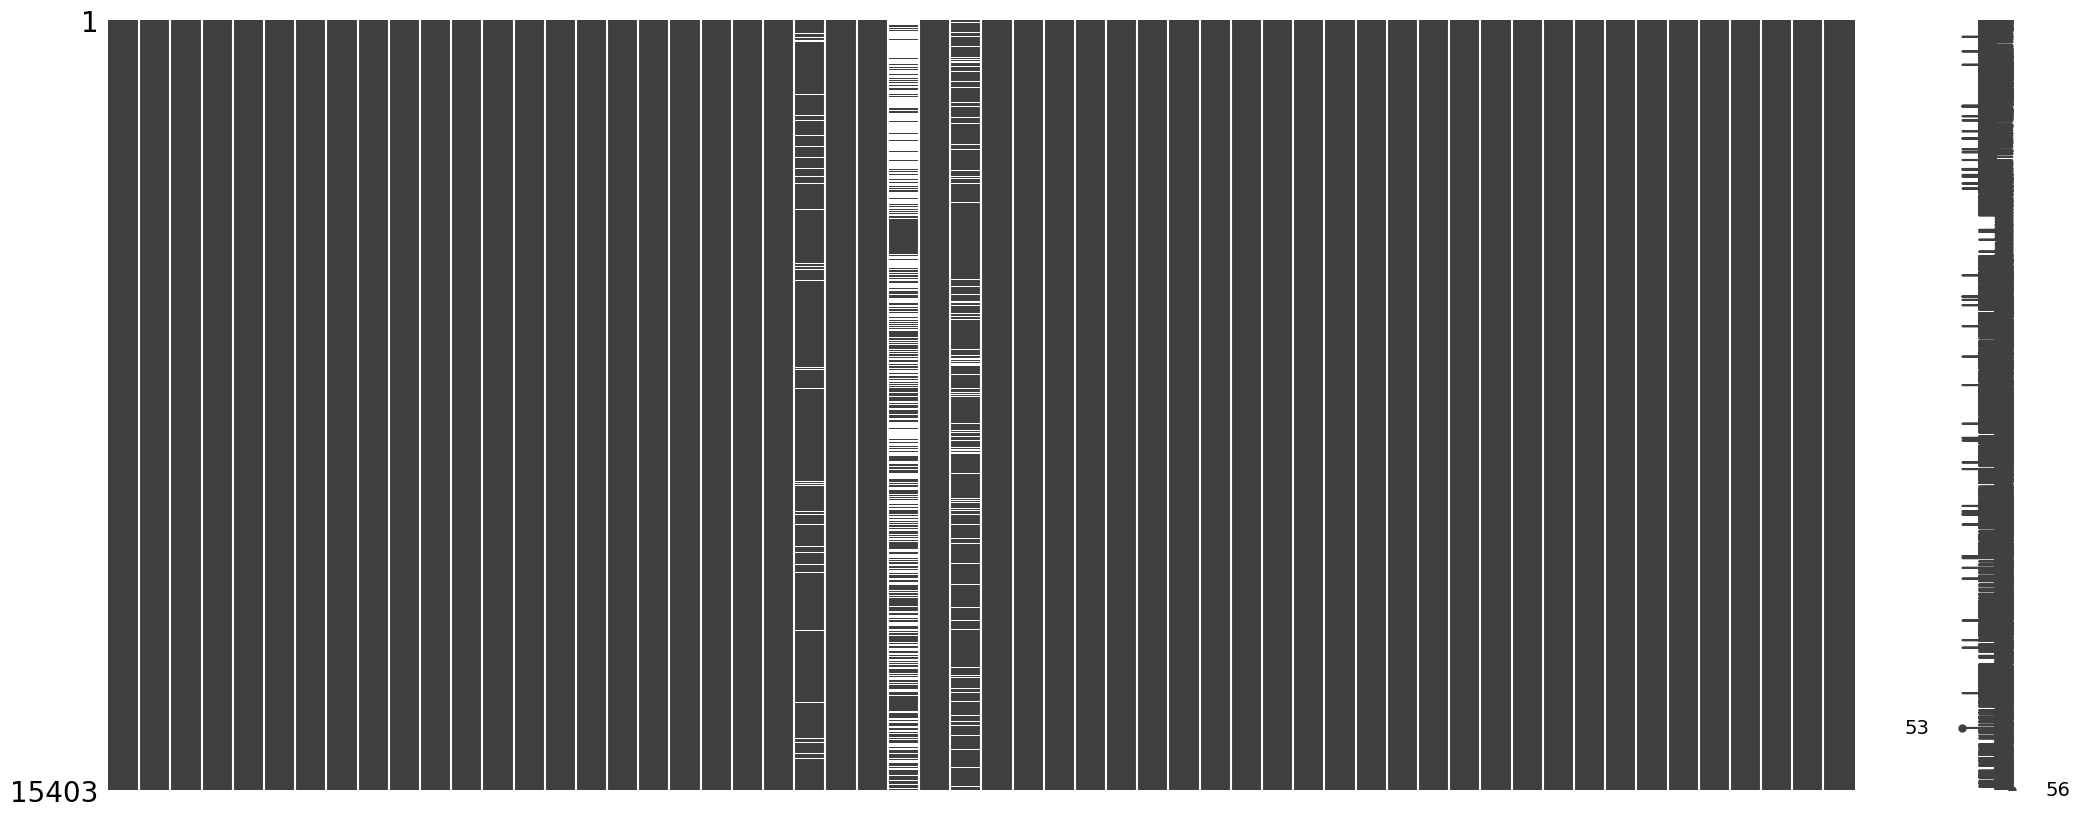

In [73]:
import missingno as msno
msno.matrix(df)

In [82]:
print(df[['GLUCOSE','B-TYPE NATRIURETIC PEPTIDE','Ejection Fraction']].dtypes)

GLUCOSE                       object
B-TYPE NATRIURETIC PEPTIDE    object
Ejection Fraction             object
dtype: object


In [83]:
print(df[['GLUCOSE','B-TYPE NATRIURETIC PEPTIDE','Ejection Fraction']].head())

  GLUCOSE B-TYPE NATRIURETIC PEPTIDE Ejection Fraction
0      80                       1880                35
1     112                        NaN                42
2     187                        210               NaN
3     130                        NaN                42
4     144                       1840                16


In [86]:
columns_to_fill = ['GLUCOSE', 'B-TYPE NATRIURETIC PEPTIDE', 'Ejection Fraction']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

Series([], dtype: int64)


In [88]:
total_unique_values = df.nunique()

print(total_unique_values)

Serial Number                                   15403
Admission Number                                11946
Date of Admission                                1192
Date of Discharge                                1212
AGE                                                96
GENDER                                              2
RURAL(R) /Urban(U)                                  2
TYPE OF ADMISSION-EMERGENCY/OPD                     2
month year                                         24
DURATION OF STAY                                   52
duration of intensive unit stay                    44
OUTCOME                                             3
SMOKING                                             2
ALCOHOL                                             2
Diabetes Mellitus                                   2
Hypertension                                        2
Coronary Artery Disease                             2
CARDIOMYOPATHY                                      2
CHRONIC KIDNEY DISEASE      

In [89]:
columns_to_check = ['CHEST INFECTION']  # replace with your column names

for col in columns_to_check:
    print(f"{col}: {df[col].unique()}")

CHEST INFECTION: ['0' '1' '\\']


In [90]:
df = df[df['CHEST INFECTION'] != '\\']
columns_to_check = ['CHEST INFECTION']  # replace with your column names



CHEST INFECTION: ['0' '1']


In [91]:
print(df.dtypes)

Serial Number                                    int64
Admission Number                                object
Date of Admission                               object
Date of Discharge                               object
AGE                                              int64
GENDER                                          object
RURAL(R) /Urban(U)                              object
TYPE OF ADMISSION-EMERGENCY/OPD                 object
month year                                      object
DURATION OF STAY                                 int64
duration of intensive unit stay                  int64
OUTCOME                                         object
SMOKING                                          int64
ALCOHOL                                          int64
Diabetes Mellitus                                int64
Hypertension                                     int64
Coronary Artery Disease                          int64
CARDIOMYOPATHY                                   int64
CHRONIC KI

In [40]:
def replace_column_names(data_file, headings_file):
    df = pd.read_csv(data_file)
    headings_df = pd.read_csv(headings_file)
    
    # Create a dictionary from the headings DataFrame
    headings_dict = dict(zip(headings_df['Table Heading'], headings_df['Explanatory Name']))
    
    # Replace the column names
    df.rename(columns=headings_dict, inplace=True)
    
    
    return df

df = replace_column_names('HDHI Admission data.csv', 'table_headings.csv')

print(df.columns)

Index(['Serial Number', 'Admission Number', 'Date of Admission',
       'Date of Discharge', 'AGE', 'GENDER', 'RURAL(R) /Urban(U)',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'Diabetes Mellitus', 'Hypertension', 'Coronary Artery Disease',
       'CARDIOMYOPATHY', 'CHRONIC KIDNEY DISEASE', 'Haemoglobin',
       'TOTAL LEUKOCYTES COUNT', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE',
       'B-TYPE NATRIURETIC PEPTIDE', 'RAISED CARDIAC ENZYMES',
       'Ejection Fraction', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA',
       'Acute coronary Syndrome', 'ST ELEVATION MYOCARDIAL INFARCTION',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE',
       'HEART FAILURE WITH REDUCED EJECTION FRACTION',
       'HEART FAILURE WITH NORMAL EJECTION FRACTION', 'Valvular Heart Disease',
       'Complete Heart Block', 'Sick sinus syndrome', 'ACUTE KIDNEY INJURY',
       'Cerebrovascular Accident

In [43]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)
print("\n data types")
print(df.dtypes)

Haemoglobin                    252
TOTAL LEUKOCYTES COUNT         286
PLATELETS                      285
GLUCOSE                        863
UREA                           241
CREATININE                     247
B-TYPE NATRIURETIC PEPTIDE    8441
Ejection Fraction             1505
dtype: int64

 data types
Serial Number                                    int64
Admission Number                                object
Date of Admission                               object
Date of Discharge                               object
AGE                                              int64
GENDER                                          object
RURAL(R) /Urban(U)                              object
TYPE OF ADMISSION-EMERGENCY/OPD                 object
month year                                      object
DURATION OF STAY                                 int64
duration of intensive unit stay                  int64
OUTCOME                                         object
SMOKING                           

In [93]:


for col in df.columns:
    print(f"{col}:\n{df[col].head(5)}\n")

Serial Number:
0    1
1    2
2    3
3    4
4    5
Name: Serial Number, dtype: int64

Admission Number:
0    234735
1    234696
2    234882
3    234635
4    234486
Name: Admission Number, dtype: object

Date of Admission:
0    4/1/2017
1    4/1/2017
2    4/1/2017
3    4/1/2017
4    4/1/2017
Name: Date of Admission, dtype: object

Date of Discharge:
0     4/3/2017
1     4/5/2017
2     4/3/2017
3     4/8/2017
4    4/23/2017
Name: Date of Discharge, dtype: object

AGE:
0    81
1    65
2    53
3    67
4    60
Name: AGE, dtype: int64

GENDER:
0    M
1    M
2    M
3    F
4    F
Name: GENDER, dtype: object

RURAL(R) /Urban(U):
0    R
1    R
2    U
3    U
4    U
Name: RURAL(R) /Urban(U), dtype: object

TYPE OF ADMISSION-EMERGENCY/OPD:
0    E
1    E
2    E
3    E
4    E
Name: TYPE OF ADMISSION-EMERGENCY/OPD, dtype: object

month year:
0    Apr-17
1    Apr-17
2    Apr-17
3    Apr-17
4    Apr-17
Name: month year, dtype: object

DURATION OF STAY:
0     3
1     5
2     3
3     8
4    23
Name: DURATI

In [99]:
# Specify the columns and their new data types
columns_to_convert = {
    'Haemoglobin': 'float64',
    'TOTAL LEUKOCYTES COUNT': 'float64',
    'PLATELETS': 'int64',
    'GLUCOSE': 'float64',
    'UREA': 'int64',
    'CREATININE': 'int64',
    'B-TYPE NATRIURETIC PEPTIDE': 'int64',
    'Ejection Fraction': 'int64'
}

for col, new_type in columns_to_convert.items():
    try:
        df[col] = df[col].astype(new_type)
    except ValueError:
        print(f"Cannot convert column {col} to {new_type}")

print(df.dtypes)

Cannot convert column Haemoglobin to float64
Cannot convert column TOTAL LEUKOCYTES COUNT to float64
Cannot convert column PLATELETS to int64
Cannot convert column GLUCOSE to float64
Cannot convert column UREA to int64
Cannot convert column CREATININE to int64
Cannot convert column B-TYPE NATRIURETIC PEPTIDE to int64
Cannot convert column Ejection Fraction to int64
Serial Number                                    int64
Admission Number                                object
Date of Admission                               object
Date of Discharge                               object
AGE                                              int64
GENDER                                          object
RURAL(R) /Urban(U)                              object
TYPE OF ADMISSION-EMERGENCY/OPD                 object
month year                                      object
DURATION OF STAY                                 int64
duration of intensive unit stay                  int64
OUTCOME                    

In [98]:
columns_to_convert = ['Haemoglobin', 'TOTAL LEUKOCYTES COUNT', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'B-TYPE NATRIURETIC PEPTIDE', 'Ejection Fraction']  # replace with your column names

for col in columns_to_convert:
    try:
        df.loc[:, col] = df.loc[:, col].fillna(0).astype('int64')
    except ValueError:
        print(f"Cannot convert column {col} to int64")

print(df.dtypes)

Cannot convert column Haemoglobin to int64
Cannot convert column TOTAL LEUKOCYTES COUNT to int64
Cannot convert column PLATELETS to int64
Cannot convert column GLUCOSE to int64
Cannot convert column UREA to int64
Cannot convert column CREATININE to int64
Cannot convert column B-TYPE NATRIURETIC PEPTIDE to int64
Cannot convert column Ejection Fraction to int64
Serial Number                                    int64
Admission Number                                object
Date of Admission                               object
Date of Discharge                               object
AGE                                              int64
GENDER                                          object
RURAL(R) /Urban(U)                              object
TYPE OF ADMISSION-EMERGENCY/OPD                 object
month year                                      object
DURATION OF STAY                                 int64
duration of intensive unit stay                  int64
OUTCOME                          

In [100]:
total_unique_values = df.nunique()

print(total_unique_values)

Serial Number                                   15402
Admission Number                                11945
Date of Admission                                1192
Date of Discharge                                1212
AGE                                                96
GENDER                                              2
RURAL(R) /Urban(U)                                  2
TYPE OF ADMISSION-EMERGENCY/OPD                     2
month year                                         24
DURATION OF STAY                                   52
duration of intensive unit stay                    44
OUTCOME                                             3
SMOKING                                             2
ALCOHOL                                             2
Diabetes Mellitus                                   2
Hypertension                                        2
Coronary Artery Disease                             2
CARDIOMYOPATHY                                      2
CHRONIC KIDNEY DISEASE      

In [104]:
df.to_csv('output.csv', index=False)

In [105]:
df = pd.read_csv('output.csv')

print(df.dtypes)

Serial Number                                    int64
Admission Number                                object
Date of Admission                               object
Date of Discharge                               object
AGE                                              int64
GENDER                                          object
RURAL(R) /Urban(U)                              object
TYPE OF ADMISSION-EMERGENCY/OPD                 object
month year                                      object
DURATION OF STAY                                 int64
duration of intensive unit stay                  int64
OUTCOME                                         object
SMOKING                                          int64
ALCOHOL                                          int64
Diabetes Mellitus                                int64
Hypertension                                     int64
Coronary Artery Disease                          int64
CARDIOMYOPATHY                                   int64
CHRONIC KI

In [106]:
total_unique_values = df.nunique()

print(total_unique_values)

Serial Number                                   15402
Admission Number                                11945
Date of Admission                                1192
Date of Discharge                                1212
AGE                                                96
GENDER                                              2
RURAL(R) /Urban(U)                                  2
TYPE OF ADMISSION-EMERGENCY/OPD                     2
month year                                         24
DURATION OF STAY                                   52
duration of intensive unit stay                    44
OUTCOME                                             3
SMOKING                                             2
ALCOHOL                                             2
Diabetes Mellitus                                   2
Hypertension                                        2
Coronary Artery Disease                             2
CARDIOMYOPATHY                                      2
CHRONIC KIDNEY DISEASE      

In [107]:
df = pd.read_csv('modified_output.csv')
print(df.dtypes)

Serial Number                                     int64
Admission Number                                 object
Date of Admission                                object
Date of Discharge                                object
AGE                                               int64
GENDER                                           object
RURAL(R) /Urban(U)                               object
TYPE OF ADMISSION-EMERGENCY/OPD                  object
month year                                       object
DURATION OF STAY                                  int64
duration of intensive unit stay                   int64
OUTCOME                                          object
SMOKING                                            bool
ALCOHOL                                            bool
Diabetes Mellitus                                  bool
Hypertension                                       bool
Coronary Artery Disease                            bool
CARDIOMYOPATHY                                  